In [20]:
# Load packages 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

In [14]:
# Read in GeoJSON of all 
national_results = gpd.read_file('/capstone/justice40/data/national_results.geojson')
national_results.head()

# Read in GeoJSON of all 
state_polygons = gpd.read_file('/capstone/justice40/data/state_polygons/state_polygons.shp')
state_polygons.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


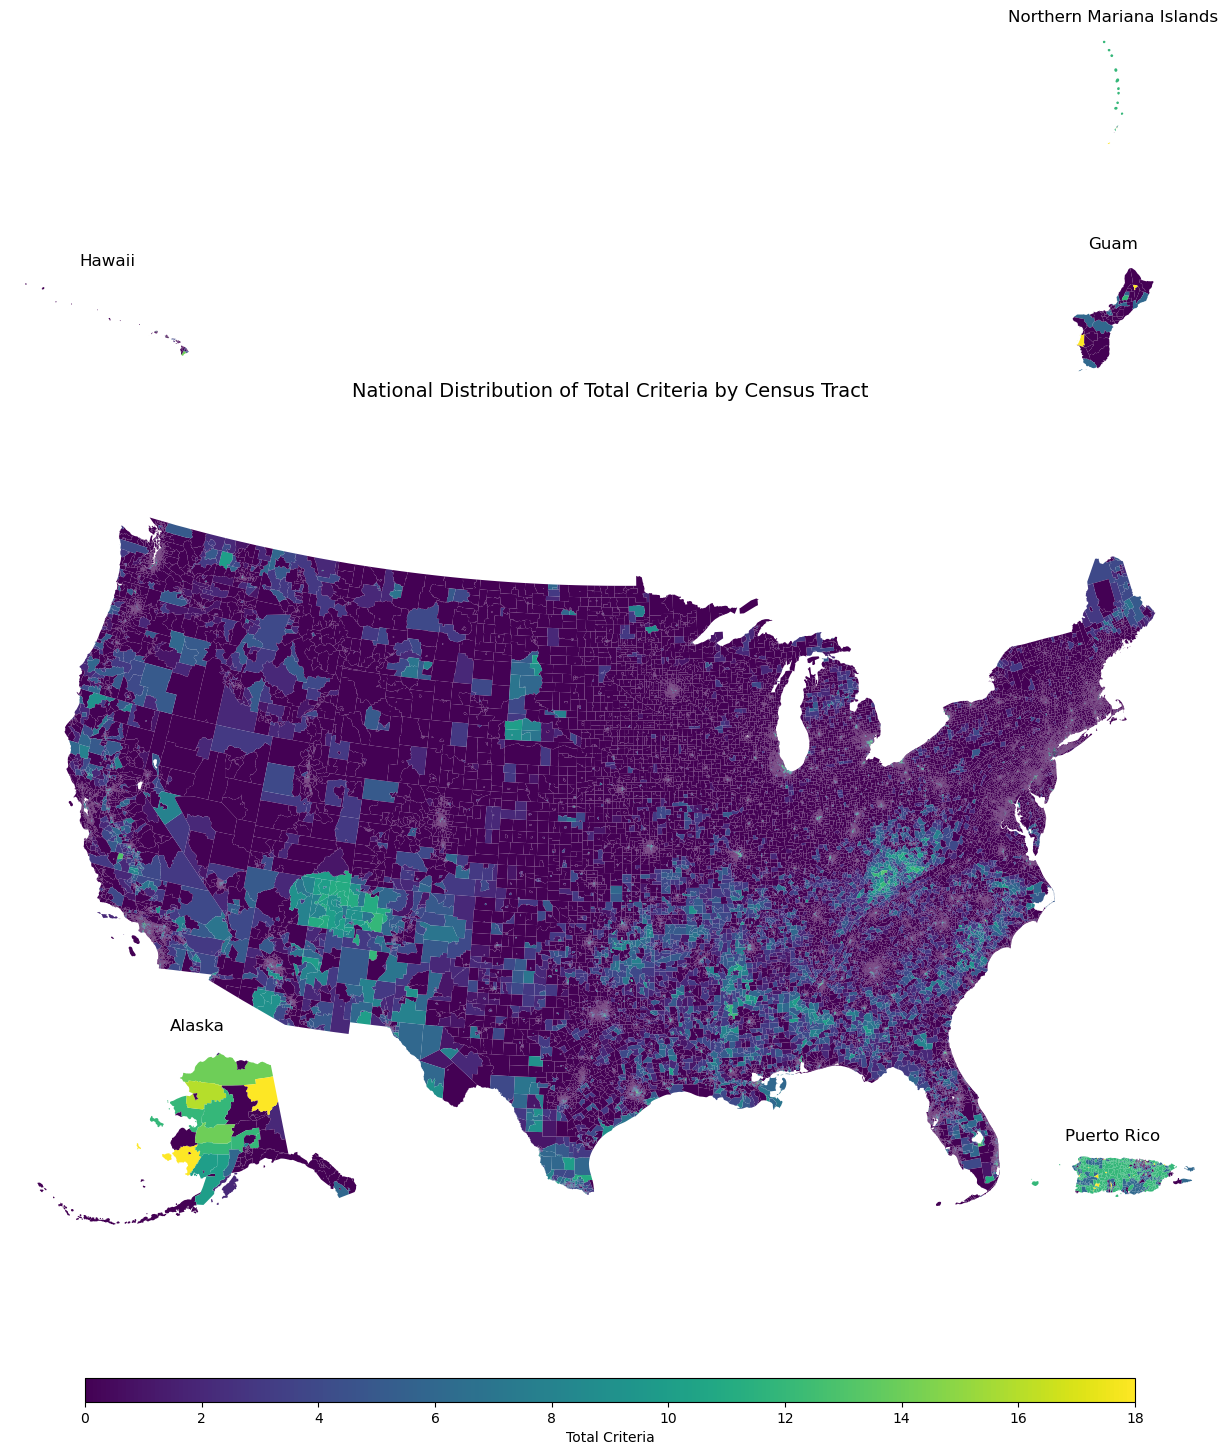

In [3]:
def create_national_map(gdf):
    # Create figure and axes
    fig = plt.figure(figsize=(15, 12))
    
    # Main map axis for CONUS
    ax_main = plt.axes([0.1, 0.2, 0.8, 0.7])
    
    # Create inset axes
    # Left column of insets
    ax_ak = inset_axes(ax_main, width="30%", height="25%", 
                       bbox_to_anchor=(0.0, 0.0, 1, 1),
                       bbox_transform=ax_main.transAxes,
                       loc=3)  # lower left
    ax_hi = inset_axes(ax_main, width="15%", height="15%", 
                       bbox_to_anchor=(0.0, 0.3, 1, 1),
                       bbox_transform=ax_main.transAxes,
                       loc=2)  # upper left
    
    # Right column of insets
    ax_pr = inset_axes(ax_main, width="15%", height="15%", 
                       bbox_to_anchor=(0.0, 0.0, 1, 1),
                       bbox_transform=ax_main.transAxes,
                       loc=4)  # lower right
    ax_gu = inset_axes(ax_main, width="15%", height="15%", 
                       bbox_to_anchor=(0.0, 0.3, 1, 1),
                       bbox_transform=ax_main.transAxes,
                       loc=1)  # upper right
    ax_mp = inset_axes(ax_main, width="15%", height="15%", 
                       bbox_to_anchor=(0.0, 0.6, 1, 1),
                       bbox_transform=ax_main.transAxes,
                       loc=1)  # upper right, above Guam
    
    # Filter regions using FIPS codes
    territory_fips = [2, 15, 60, 66, 69, 72, 78]  # AK, HI, AS, GU, MP, PR, VI
    gdf_conus = gdf[~(gdf['tract_id'] // 1000000000).isin(territory_fips)].copy()
    gdf_conus = gdf_conus.to_crs('EPSG:5070')
    
    # Filter each territory
    gdf_ak = gdf[gdf['tract_id'] // 1000000000 == 2].to_crs('EPSG:3338')
    gdf_hi = gdf[gdf['tract_id'] // 1000000000 == 15].to_crs('EPSG:4269')
    gdf_pr = gdf[gdf['tract_id'] // 1000000000 == 72].to_crs('EPSG:4269')
    gdf_gu = gdf[gdf['tract_id'] // 1000000000 == 66].to_crs('EPSG:4269')
    gdf_mp = gdf[gdf['tract_id'] // 1000000000 == 69].to_crs('EPSG:4269')
    
    # Plot each region
    main_plot = gdf_conus.plot(ax=ax_main, column='total_criteria', legend=False)
    
    # Plot insets if they contain data
    if not gdf_ak.empty:
        ak_plot = gdf_ak.plot(ax=ax_ak, column='total_criteria', legend=False)
        ax_ak.set_title('Alaska', pad=10)
    if not gdf_hi.empty:
        hi_plot = gdf_hi.plot(ax=ax_hi, column='total_criteria', legend=False)
        ax_hi.set_title('Hawaii', pad=10)
    if not gdf_pr.empty:
        pr_plot = gdf_pr.plot(ax=ax_pr, column='total_criteria', legend=False)
        ax_pr.set_title('Puerto Rico', pad=10)
    if not gdf_gu.empty:
        gu_plot = gdf_gu.plot(ax=ax_gu, column='total_criteria', legend=False)
        ax_gu.set_title('Guam', pad=10)
    if not gdf_mp.empty:
        mp_plot = gdf_mp.plot(ax=ax_mp, column='total_criteria', legend=False)
        ax_mp.set_title('Northern Mariana Islands', pad=10)
    
    # Remove axes frames
    for ax in [ax_main, ax_ak, ax_hi, ax_pr, ax_gu, ax_mp]:
        ax.axis('off')
    
    # Add horizontal colorbar at bottom
    cax = fig.add_axes([0.15, 0.1, 0.7, 0.02])
    sm = plt.cm.ScalarMappable(cmap='viridis', 
                              norm=plt.Normalize(vmin=gdf['total_criteria'].min(), 
                                               vmax=gdf['total_criteria'].max()))
    cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', label='Total Criteria')
    
    # Main title
    plt.suptitle('National Distribution of Total Criteria by Census Tract', 
                 y=0.95, 
                 fontsize=14)
    
    return fig

# Usage:
fig = create_national_map(national_results)
plt.show()

In [12]:
print(national_results['standardized_g_star'].min())
print(national_results['standardized_g_star'].max())
print(national_results['standardized_g_star'].mean())

-0.620617176256481
3.5506852981585095
-0.011813564785327024


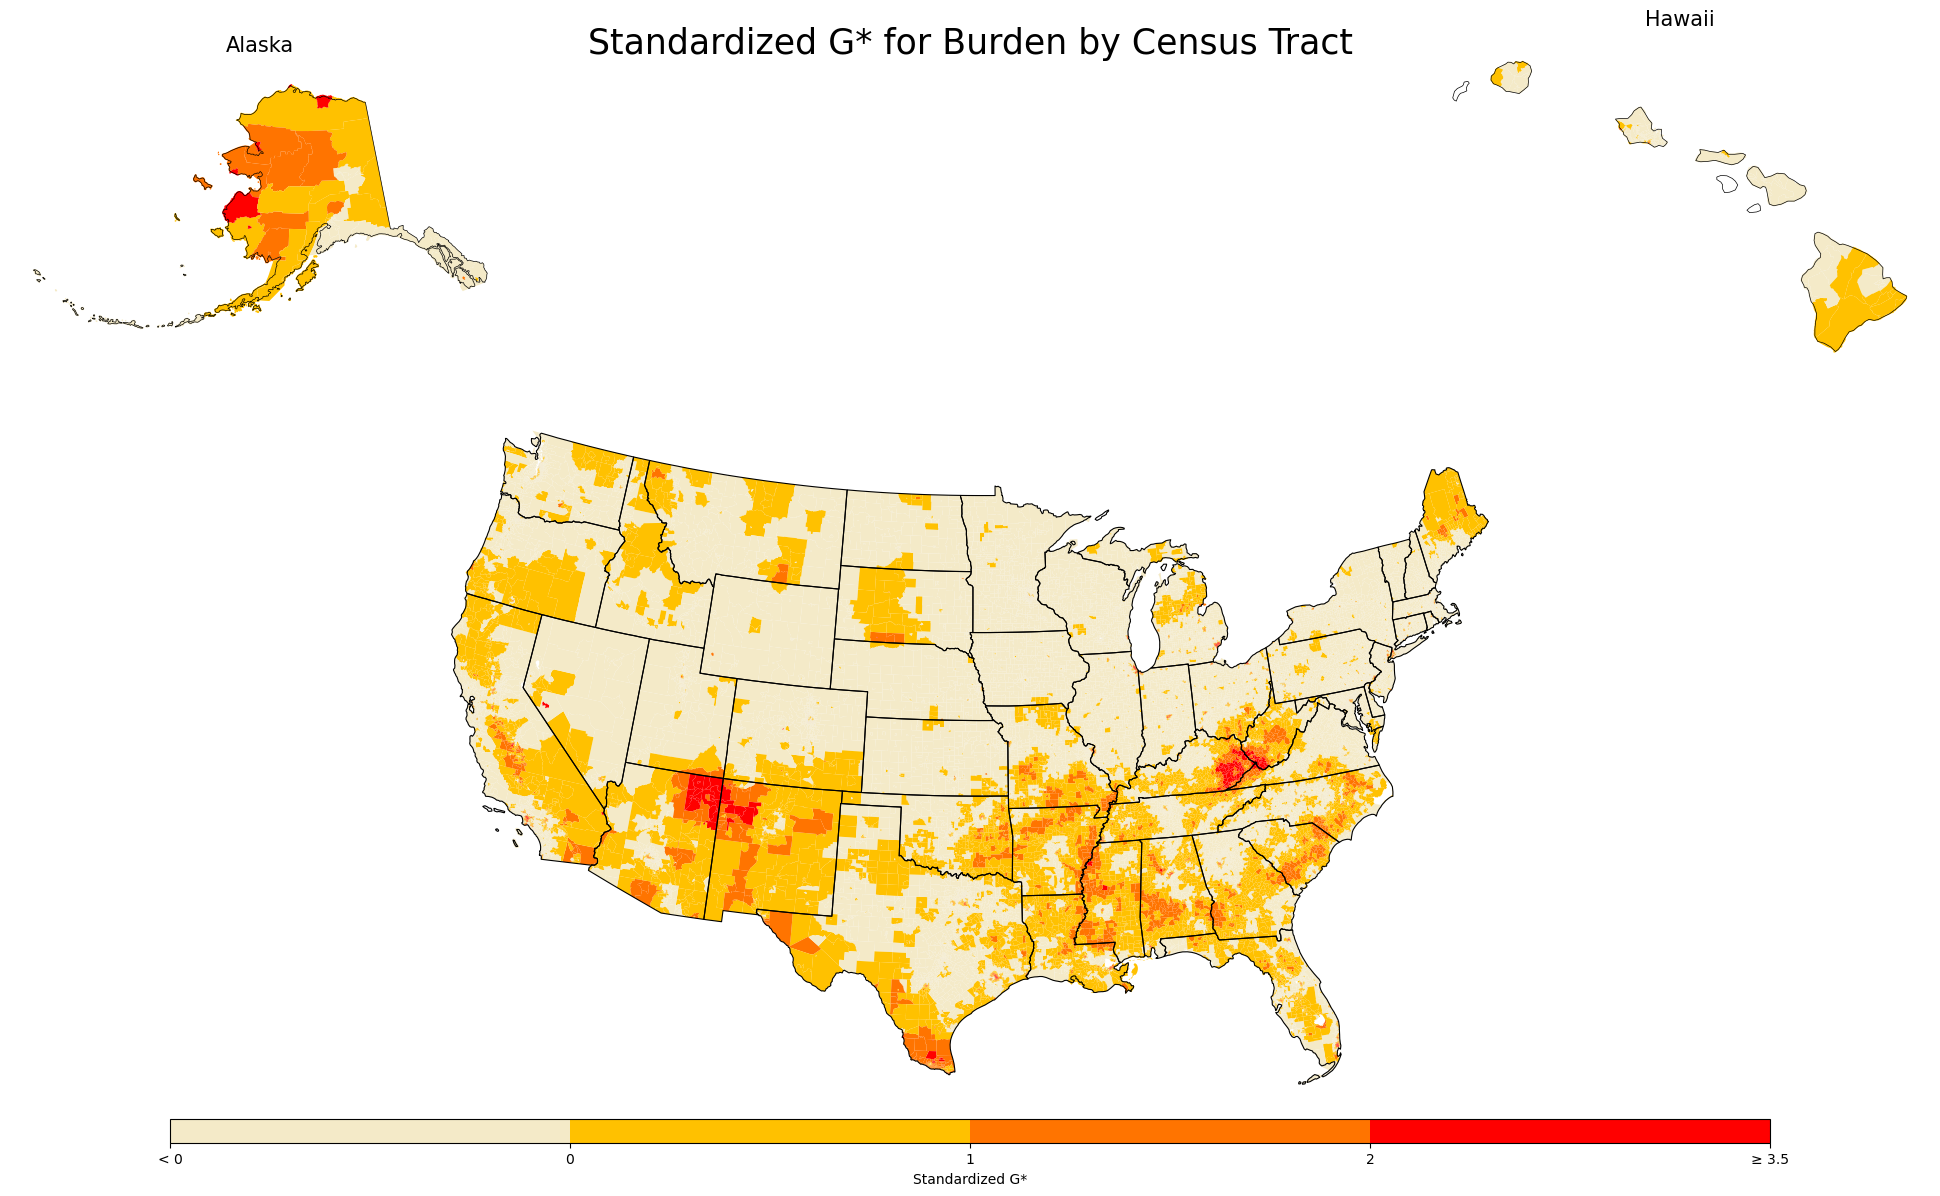

In [43]:
def create_national_map(gdf, state_gdf):
    # Create figure
    fig = plt.figure(figsize=(20, 12))
    
    # Create three separate axes for each region
    # Alaska (top left corner)
    ax_ak = plt.axes([0.02, 0.65, 0.25, 0.3])
    
    # Hawaii (top right corner)
    ax_hi = plt.axes([0.73, 0.65, 0.25, 0.3])
    
    # CONUS (much larger and centered)
    ax_main = plt.axes([0.1, 0.05, 0.8, 0.58])
    
    # Explicit FIPS code filtering to exclude Puerto Rico (72)
    conus_fips = [str(i).zfill(2) for i in range(1, 57)]
    conus_fips = [x for x in conus_fips if x not in ['02', '15', '72']]
    
    # Filter and project data
    gdf_conus = gdf[~(gdf['tract_id'] // 1000000000).isin([2, 15, 72])].copy()
    gdf_conus = gdf_conus.to_crs('EPSG:5070')
    state_conus = state_gdf[state_gdf['STATEFP'].isin(conus_fips)].to_crs('EPSG:5070')
    
    # Filter and project Alaska with Alaska Albers projection
    gdf_ak = gdf[gdf['tract_id'] // 1000000000 == 2].to_crs('EPSG:3338')  # Alaska Albers
    state_ak = state_gdf[state_gdf['STATEFP'] == '02'].to_crs('EPSG:3338')
    
    # Filter and project Hawaii 
    gdf_hi = gdf[gdf['tract_id'] // 1000000000 == 15].to_crs('EPSG:3750')  # Hawaii Albers
    state_hi = state_gdf[state_gdf['STATEFP'] == '15'].to_crs('EPSG:3750')
    
    # Updated custom colormap with normal red instead of dark red
    colors = ['#F4EAC8',  # color for < 0
             '#ffc100',   # color for 0-1
             '#ff7400',   # color for 1-2
             '#ff0000']   # color for >= 2
    positions = [-0.62, 0, 1, 2, 3.55]
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
    norm = BoundaryNorm(positions, cmap.N)
    
    # Plot regions
    state_conus.boundary.plot(ax=ax_main, color='black', linewidth=0.8)
    main_plot = gdf_conus.plot(ax=ax_main, column='standardized_g_star', 
                              cmap=cmap, norm=norm, legend=False)
    
    # Set the extent for CONUS to zoom in but show all states
    ax_main.set_xlim(state_conus.total_bounds[0] - 1e5, state_conus.total_bounds[2] + 1e5)
    ax_main.set_ylim(state_conus.total_bounds[1] - 1e5, state_conus.total_bounds[3] + 1e5)
    
    state_ak.boundary.plot(ax=ax_ak, color='black', linewidth=0.5)
    ak_plot = gdf_ak.plot(ax=ax_ak, column='standardized_g_star', 
                         cmap=cmap, norm=norm, legend=False)
    ax_ak.set_title('Alaska', pad=15, size=15)
    
    state_hi.boundary.plot(ax=ax_hi, color='black', linewidth=0.5)
    hi_plot = gdf_hi.plot(ax=ax_hi, column='standardized_g_star', 
                         cmap=cmap, norm=norm, legend=False)
    ax_hi.set_title('Hawaii', pad=15, size=15)
    
    # Remove axes frames
    for ax in [ax_main, ax_ak, ax_hi]:
        ax.axis('off')
    
    # Add horizontal colorbar at bottom
    cax = fig.add_axes([0.1, 0.02, 0.8, 0.02])  # Match main map width
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', 
                       label='Standardized G*', 
                       boundaries=positions,
                       ticks=positions)
    cbar.ax.set_xticklabels(['< 0', '0', '1', '2', '≥ 3.5'])
    
    # Main title
    plt.suptitle('Standardized G* for Burden by Census Tract', 
                 y=0.95, 
                 fontsize=25)
    
    return fig

# Usage:
fig = create_national_map(national_results, state_polygons)
plt.show()